## <span style="color:#00008B">Airline Price Prediction</span>

### <span style="color:#00008B;">Introduction</span>

<p style="font-size: 1.1em; line-height: 1.6;">
The objective of this study is to analyze the flight booking dataset obtained from the “Ease My Trip” website and <br> to conduct various statistical hypothesis tests to extract meaningful insights from it.
</p>
<hr>

### <span style="color:#00008B;">Research Questions</span>

<p style="font-size: 1.1em; line-height: 1.6;">
The aim of our study is to answer the following research questions:
</p>

1. <span style="color:#3498db;">**Does price vary with Airlines?**</span>
2. <span style="color:#3498db;">**How is the price affected when tickets are bought just 1 or 2 days before departure?**</span>
3. <span style="color:#3498db;">**Does ticket price change based on the departure time and arrival time?**</span>
4. <span style="color:#3498db;">**How does the price change with the Source and Destination?**</span>
5. <span style="color:#3498db;">**How does the ticket price vary between Economy and Business class?**</span>
<br>

<hr>

### <span style="color:#00008B;">Data Collection and Methodology</span>

<p style="font-size: 1.1em; line-height: 1.6;">
The<strong>Octoparse</strong> scraping tool was used to extract data from the website. Data was collected in two parts: one for economy class tickets and another for business class tickets. A total of <strong>300,261</strong> distinct flight booking options were extracted from the site. Data collection spanned <strong>50 days</strong>, from <strong>February 11th to March 31st, 2022.</strong> <br> Dataset contains information about flight booking options from the website “Ease My Trip” for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features..
</p>


<hr>

### <span style="color:#00008B;">Features</span>

<ol style="font-size: 1.1em; line-height: 1.6;">
  <li><strong>Airline:</strong> The name of the airline company.</li>
  <li><strong>Flight:</strong> Stores information regarding the plane's flight code.</li>
  <li><strong>Source City:</strong> The city from which the flight takes off.</li>
  <li><strong>Departure Time:</strong> The departure time, categorized into 6 unique time labels.</li>
  <li><strong>Stops:</strong> The number of stops between the source and destination cities.</li>
  <li><strong>Arrival Time:</strong> The arrival time, also categorized into 6 unique time labels.</li>
  <li><strong>Destination City:</strong> The city where the flight will land.</li>
  <li><strong>Class:</strong> Either Business or Economy.</li>
  <li><strong>Duration:</strong> The overall time it takes to travel between cities, measured in hours.</li>
  <li><strong>Days Left:</strong> The number of days left, calculated by subtracting the trip date from the booking date.</li>
  <li><strong>Price:</strong> The ticket price.</li>
</ol>
<br>
<hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
warnings.filterwarnings('ignore')

In [2]:
flights = pd.read_csv('flights.csv')
flights.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
flights.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
flights.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
flights.shape

(300153, 11)

In [7]:
flights.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
flights.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
flights.isnull().any()

airline             False
flight              False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

<div style="background-color: #f0f0f0f0; padding: 10px;">
    <strong style="color:green"> 💻 Rename class name to flight_class to avoid conflicts with the reserved Python keyword class.
</div>

In [10]:
flights.rename(columns={'class' : 'flight_class'}, inplace=True)

In [11]:
flights.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [12]:
flights.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'flight_class', 'duration',
       'days_left', 'price'],
      dtype='object')

<div style="background-color: #f0f0f0f0; padding: 10px;">
    <strong style="color:green"> 💻 Flight name is like a ID, so its not nessasary for modeling and will drop from dataframe.
</div>

In [13]:
flights.drop('flight', axis=1, inplace=True)

In [14]:
num_features = ['duration', 'days_left']
cat_features = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'flight_class']

In [15]:
def pie_chart(data, feature):
    plt.figure(figsize=(3, 3))
    feature_counts = data[feature].value_counts()
    plt.pie(feature_counts, labels=feature_counts.index, autopct='%.0f%%')
    plt.title(feature + ' Distribution')
    plt.show()

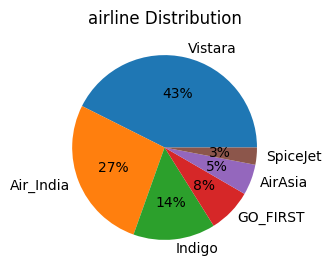

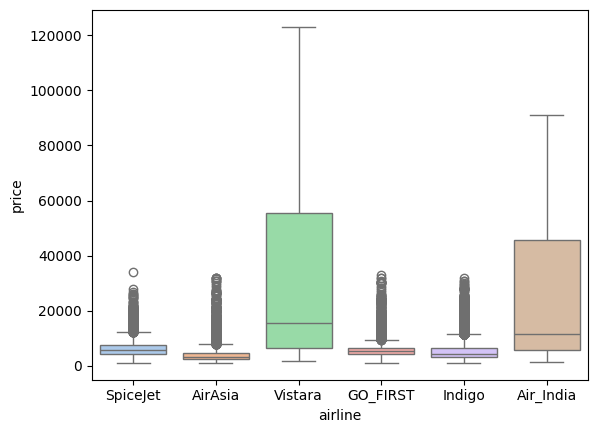

In [16]:
pie_chart(flights, 'airline')
sns.boxplot(x='airline', y='price', data=flights, palette='pastel')
plt.show()

### <span style="color:green;"> ℹ️ Airline Usage Statistics. </span>

1. **Most used airline:** Vistara  
   - **43%** of all flights  
   - **127,859 flights**

2. **Second most used airline:** Air India  
   - **27%** of all flights  
   - **80,892 flights**

3. **Least used airline:** SpiceJet  
   - **3%** of all flights  
   - **9,011 flights**

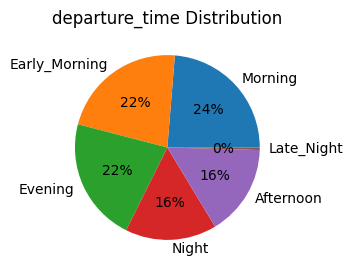

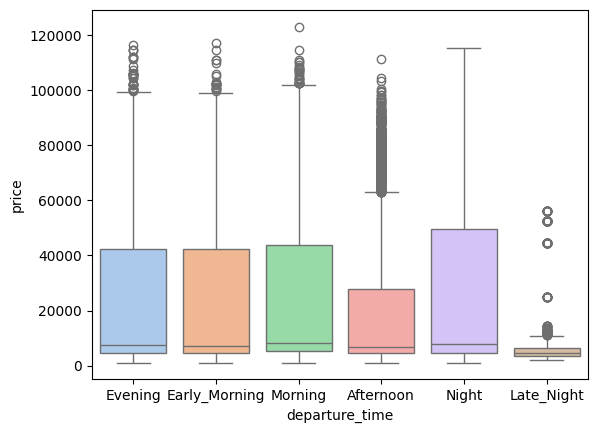

In [17]:
pie_chart(flights, 'departure_time')
sns.boxplot(x='departure_time', y='price', data=flights, palette='pastel')
plt.show()

### <span style="color:green;"> ℹ️ Except at the end of Late_Night, the frequency of the rest of the departure_time is almost equal. </span> 

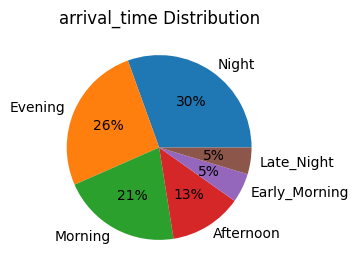

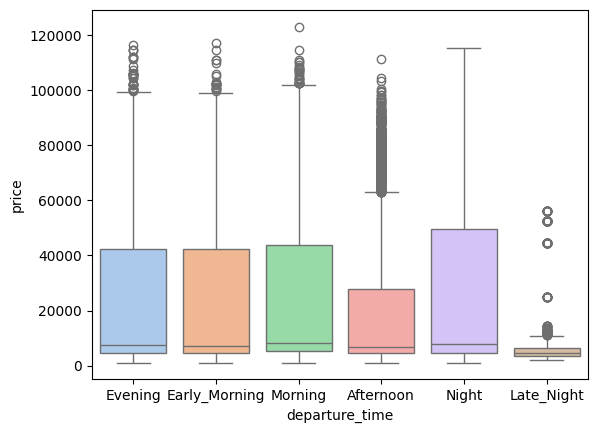

In [18]:
pie_chart(flights, 'arrival_time')
sns.boxplot(x='departure_time', y='price', data=flights, palette='pastel')
plt.show()

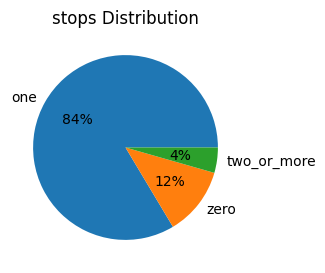

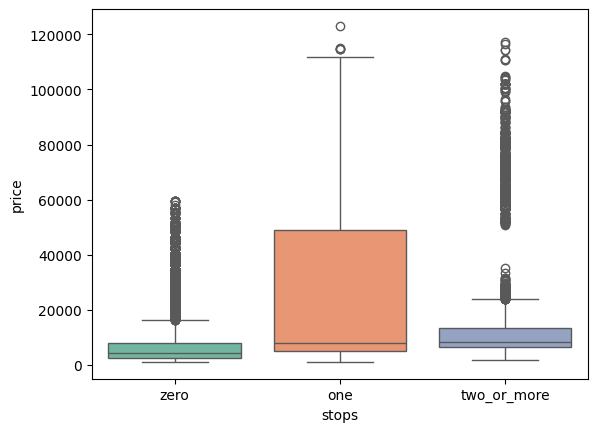

In [19]:
pie_chart(flights, 'stops')
sns.boxplot(x='stops', y='price', data=flights, palette='Set2')
plt.show()

### <span style="color:green;"> ℹ️ Flight Stopover Statistics. </span> 

1. **Majority of flights have 1 stop:**  
   - **Approximately 84%** of flights  
   - **250,863 flights**

2. **Flights with 2 or more stops:**  
   - **Just 4%** of flights  
   
3. **Flights with no stops:**  
   - **Approximately 12%** of flights  
   - **13,286 flights**


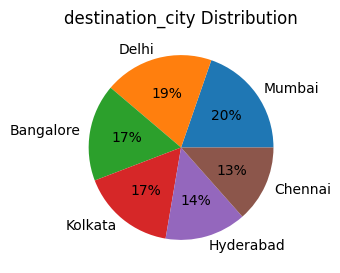

In [20]:
pie_chart(flights, 'destination_city')

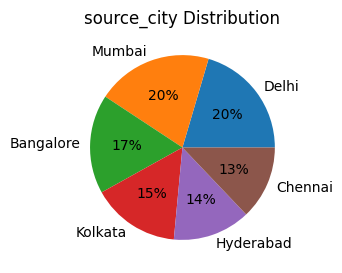

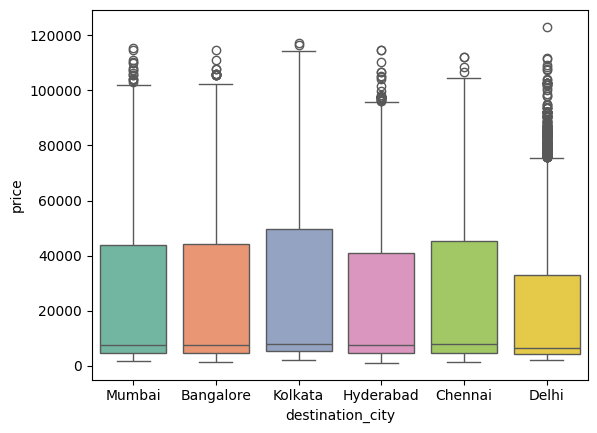

In [21]:
pie_chart(flights, 'source_city')
sns.boxplot(x='destination_city', y='price', data=flights, palette='Set2')
plt.show()

### <span style="color:green;"> ℹ️ Almost number of all flights source and distination are equal. </span> 

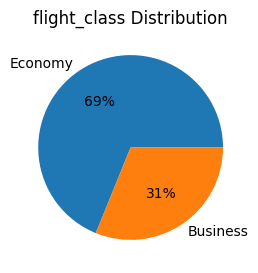

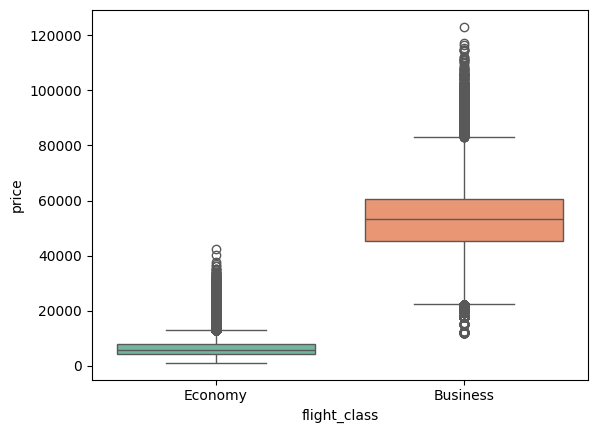

In [22]:
pie_chart(flights, 'flight_class')
sns.boxplot(x='flight_class', y='price', data=flights, palette='Set2')
plt.show()

### <span style="color:green;"> ℹ️ Flight Class Distribution and Pricing </span>

1. **Business class flights** are **obviously more expensive** than Economy class flights.

2. **Most flights are in Economy class:**  
   - **Approximately 69%** of all flights


<Axes: xlabel='duration', ylabel='price'>

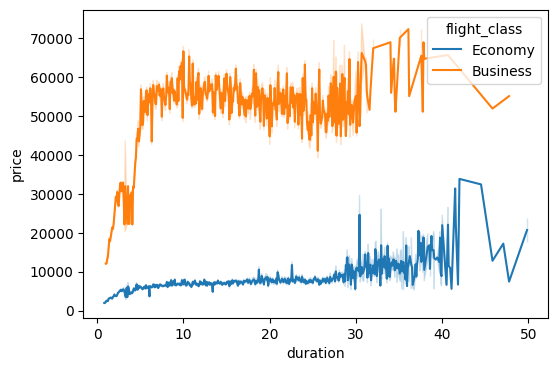

In [23]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=flights, x='duration', y='price', hue='flight_class')

### <span style="color:green;"> ℹ️ Price Trends by Flight Class and Duration </span>

1. **Business Class:**
   - For flight durations between **1 to 5 hours**, prices **grow sharply**.
   - For durations **more than 5 hours**, prices remain within a **range of 45,000 to 60,000**.

2. **Economy Class:**
   - Price shows a **linear growth** with increasing flight duration.
   - A **sharp price increase** is observed for flights with a duration of **47 hours**.


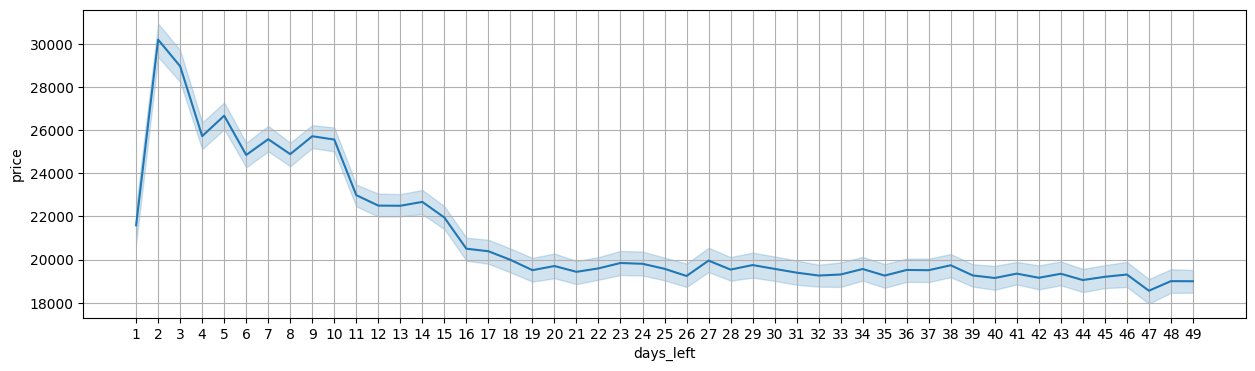

In [24]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=flights, x='days_left', y='price')
plt.grid(True)

# Increase the number of ticks on the x-axis
plt.xticks(ticks=range(flights['days_left'].min(), flights['days_left'].max()+1, 1))

plt.show()

### <span style="color:green;"> ℹ️ The earlier you book your ticket, the less you will pay(for values greater than 2)</span> 

#### <span style="color:red;"> ⚠️ Adjustment only for prediction </span>

**Important:** When a ticket is purchased **one day before the flight** (`days_left = 1`), it will be treated as if it were purchased **15 days in advance** (`days_left = 15`). <br>This adjustment accounts for the typical **reduction in ticket prices** observed the day before the flight. Conversely, tickets purchased **two days before the flight** tend to be **more expensive**.
<br><br>
**Note:** Data for tickets purchased one day before the flight has been excluded from the model due to its limited quantity and its negative impact on accuracy.

In [25]:
flights = flights[flights['days_left'] != 1]

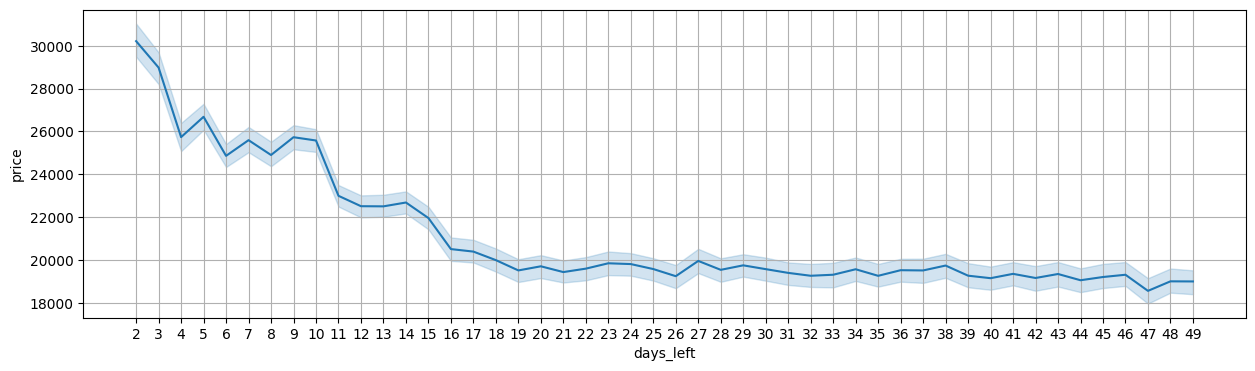

In [26]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=flights, x='days_left', y='price')
plt.grid(True)

plt.xticks(ticks=range(flights['days_left'].min(), flights['days_left'].max()+1, 1))

plt.show()

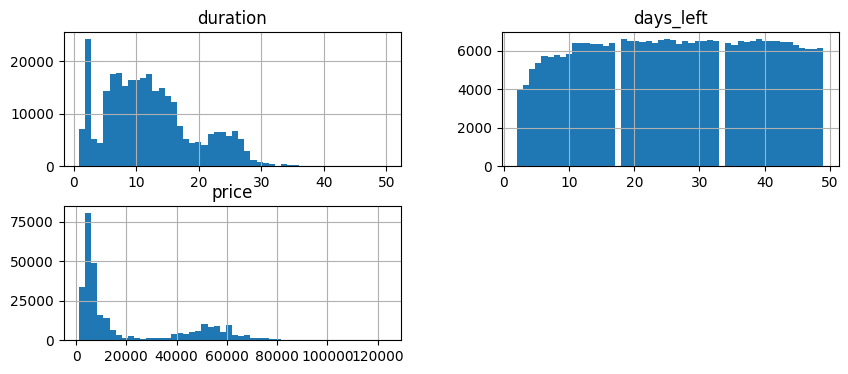

In [27]:
flights.hist(bins=50, figsize=(10, 4))
plt.show()

In [28]:
df = flights.copy()
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
118,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.25,2,5953
119,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.33,2,5953
120,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,2,5955
121,Vistara,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,2,5955
122,Vistara,Delhi,Evening,zero,Night,Mumbai,Economy,2.25,2,5955


In [29]:
df.airline = df.airline.replace(
    {
        'Vistara' : 1,
        'Air_India' : 2,
        'Indigo' : 3,
        'GO_FIRST' : 4,
        'AirAsia': 5,
        'SpiceJet' : 6  
    }
)

In [30]:
df.source_city = df.source_city.replace(
    {
        'Delhi' : 1,
        'Mumbai' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad'  : 5,
        'Chennai' : 6
    }
)

In [31]:
df.departure_time = df.departure_time.replace(
    {
        'Morning' : 1,
        'Early_Morning' : 2, 
        'Evening' : 3,
        'Night' : 4,
        'Afternoon' : 5, 
        'Late_Night' : 6
    }
)

In [32]:
df.stops = df.stops.replace(
    {
        'one' : 1,
        'zero' : 2,
        'two_or_more' : 3
    }
)

In [33]:
df.arrival_time = df.arrival_time.replace(
    {
        'Night' : 1,
        'Evening' : 2,
        'Morning' : 3,
        'Afternoon' : 4,
        'Early_Morning' : 5,
        'Late_Night' : 6
    }
)

In [34]:
df.destination_city = df.destination_city.replace(
    {
        'Mumbai' : 1,
        'Delhi' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad' : 5,
        'Chennai' : 6
    }
)

In [35]:
df.flight_class = df.flight_class.replace(
    {
        'Economy' : 1,
        'Business' :2
    }
)

In [36]:
flights.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
118,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.25,2,5953
119,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.33,2,5953
120,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,2,5955
121,Vistara,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,2,5955
122,Vistara,Delhi,Evening,zero,Night,Mumbai,Economy,2.25,2,5955


In [37]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
118,6,1,2,2,3,1,1,2.25,2,5953
119,6,1,3,2,1,1,1,2.33,2,5953
120,1,1,1,2,3,1,1,2.08,2,5955
121,1,1,3,2,1,1,1,2.17,2,5955
122,1,1,3,2,1,1,1,2.25,2,5955


In [38]:
df.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
count,298226.000000,298226.000000,298226.000000,298226.000000,298226.000000,298226.000000,298226.000000,298226.000000,298226.000000,298226.000000
mean,2.152773,3.206471,2.793720,1.208194,2.499500,3.268109,1.312585,12.207909,26.166320,20885.123185
std,1.348692,1.685961,1.401818,0.503329,1.408574,1.688654,0.463548,7.177245,13.454478,22718.108822
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,2.000000,1105.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,6.830000,15.000000,4761.000000
50%,2.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,11.250000,26.000000,7423.000000
75%,3.000000,5.000000,4.000000,1.000000,3.000000,5.000000,2.000000,16.080000,38.000000,42521.000000
max,6.000000,6.000000,6.000000,3.000000,6.000000,6.000000,2.000000,49.830000,49.000000,123071.000000


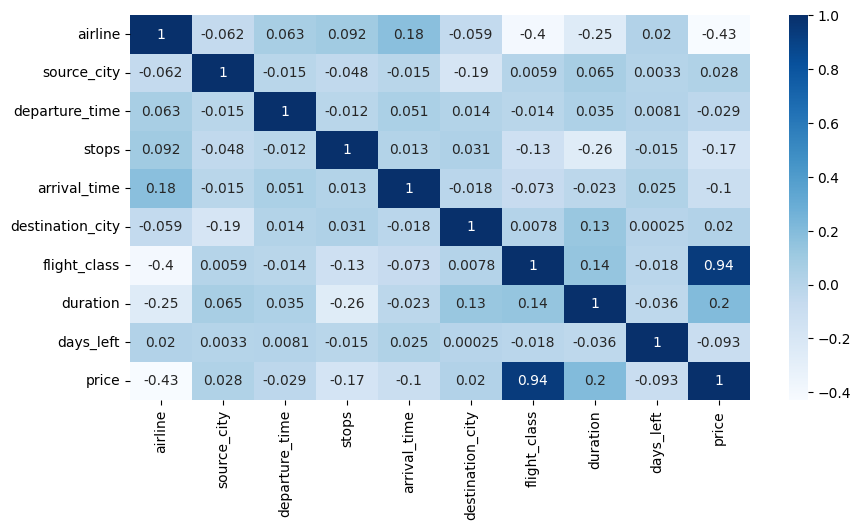

In [39]:
corr = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [40]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price               1.000000
flight_class        0.938535
duration            0.203875
source_city         0.027728
destination_city    0.019599
departure_time     -0.029063
days_left          -0.092818
arrival_time       -0.101622
stops              -0.173789
airline            -0.428987
Name: price, dtype: float64

<div style="background-color: #f0f0f0f0; padding: 10px;">
    <strong style="color:green"> 💻 Removing Some Outliers.
</div>

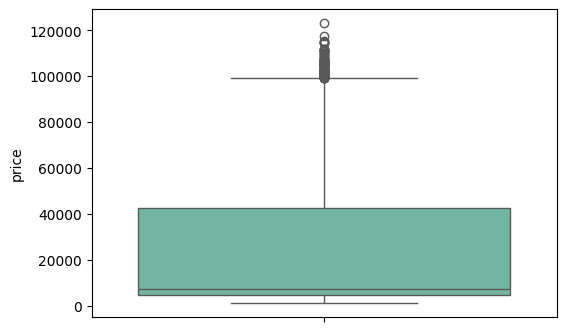

In [41]:
plt.figure(figsize=(6, 4))
sns.boxplot(df['price'], palette='Set2')
plt.show()

In [42]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [43]:
oul2 = iqr(df, 'price')

In [44]:
df = df.drop(oul2.index)

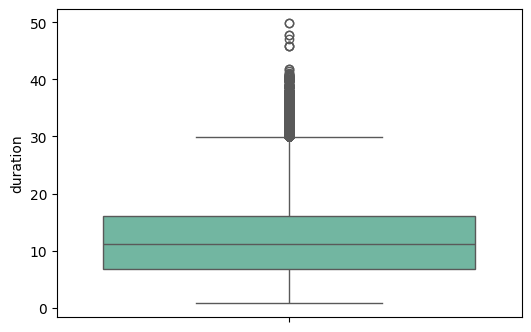

In [45]:
plt.figure(figsize=(6, 4))
sns.boxplot(df['duration'], palette='Set2')
plt.show()

In [46]:
oul3 = iqr(df, 'duration')

In [47]:
df = df.drop(oul3.index)

In [48]:
num_features = ['duration', 'days_left']
cat_features = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'flight_class']

In [49]:
X = df.drop(["price"], axis=1)
y = df["price"].copy()

In [50]:
X.shape

(295824, 9)

In [51]:
y.shape

(295824,)

In [52]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

X = X.iloc[outlier_pred == 1]
y = y.iloc[outlier_pred == 1]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [55]:
num_pipeline = make_pipeline(SimpleImputer(strategy="mean"), MinMaxScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore", sparse_output=False))

In [56]:
preprocessing = ColumnTransformer([
    ("numeric", num_pipeline, num_features),
    ("categoric", cat_pipeline, cat_features),
])

In [57]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['duration', 'days_left']),
                                                 ('categoric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source_city',
                                                   'departure_time', 'stops',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'flight_class'])])),
                ('linearregression', LinearRegression())])

In [58]:
lin_pred = lin_reg.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

lin_rmse = root_mean_squared_error(y_test, lin_pred)
lin_rmse

4316.087168220243

In [60]:
lr_r2 = metrics.r2_score(y_test, lin_pred)
lr_r2

0.9486607117696843

In [61]:
lin_rmses = -cross_val_score(lin_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

In [62]:
pd.Series(lin_rmses).describe()

count      10.000000
mean     4305.040040
std        74.163968
min      4213.487470
25%      4252.438566
50%      4295.852937
75%      4323.932350
max      4460.821909
dtype: float64

In [63]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['duration', 'days_left']),
                                                 ('categoric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source_city',
                                                   'departure_time', 'stops',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'flight_class'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [64]:
tree_pred = tree_reg.predict(X_test)
tree_rmse = root_mean_squared_error(y_test, tree_pred)
tree_rmse

2643.2800928393667

In [65]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

In [66]:
pd.Series(tree_rmses).describe()

count      10.000000
mean     2721.584530
std        96.517436
min      2550.199636
25%      2659.242781
50%      2722.069611
75%      2791.196251
max      2862.080045
dtype: float64

In [67]:
tree_r2 = metrics.r2_score(y_test, tree_pred)
tree_r2

0.9807444557015719

In [68]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor())

In [69]:
forest_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['duration', 'days_left']),
                                                 ('categoric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source_city',
                                                   'departure_time', 'stops',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'flight_class'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [70]:
forest_pred = forest_reg.predict(X_test)
forest_rmse = root_mean_squared_error(y_test, forest_pred)
forest_rmse

2172.748605062864

In [71]:
forest_rmses = -cross_val_score(forest_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

In [72]:
pd.Series(forest_rmses).describe()

count      10.000000
mean     2179.664301
std        61.129308
min      2104.951761
25%      2134.534854
50%      2173.703057
75%      2216.589980
max      2295.686023
dtype: float64

In [73]:
forest_r2 = metrics.r2_score(y_test, forest_pred)
forest_r2

0.9869896677180315

In [74]:
result = pd.DataFrame({
    'Algorithms' : ['Linear', 'Decision_Tree', 'Random_Forest'],
    'Mean_RSME' : [lin_rmses.mean(), tree_rmses.mean(), forest_rmses.mean()],
    'R2_Scores' : [lr_r2, tree_r2, forest_r2]
})

In [75]:
print(result.to_markdown(index=False))

| Algorithms    |   Mean_RSME |   R2_Scores |
|:--------------|------------:|------------:|
| Linear        |     4305.04 |    0.948661 |
| Decision_Tree |     2721.58 |    0.980744 |
| Random_Forest |     2179.66 |    0.98699  |


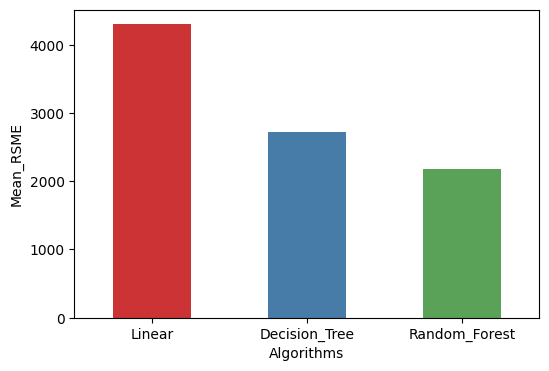

In [76]:
plt.figure(figsize=(6, 4))
sns.barplot(data=result, x='Algorithms', y='Mean_RSME', palette="Set1", width=0.5)
plt.show()

<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">
    <h2 style="color: #00796b;">Random Forest Regressor Performance</h2>
    <ul>
        <li><strong>Random Forest Regressor</strong> is the <strong>best model</strong> with the <strong>highest accuracy of 98%</strong>.</li>
        <li>It also achieved the <strong>lowest RMSE of 2,179</strong>.</li>
    </ul>
</div>


In [79]:
from scipy import stats

confidence = 0.95
squared_errors = (forest_pred - y_test) ** 2
lower_bound, upper_bound = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

In [80]:
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")

Lower Bound: 2075.01
Upper Bound: 2266.28


<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">
    <h2 style="color: #00796b;">95% confidence</h2>
    <ul>
        <li><strong>Lower Bound : </strong> 2034.67</li>
        <li><strong>Upper Bound : </strong> 2201.53</li>
    </ul>
</div>


### <span style="color:#00008B;">Answers Research Questions</span>

1. <span style="color:#3498db;">**Does price vary with Airlines?**</span><br>
**Yes It Does.**<br>**Vistara** and **Air India** are notably more expensive compared to other airlines.
  
2. <span style="color:#3498db;">**How is the price affected when tickets are bought just 1 or 2 days before departure?**</span><br>
**1 Day Before:** Potential for a price drop(same as 15 days Before).<br>
**2 Days Before:** Prices typically increase due to high demand and limited availability.
   
4. <span style="color:#3498db;">**Does ticket price change based on the departure time and arrival time?**</span><br>
 **Late-Night Flights:** Typically have the **lowest prices**.<br>
 **Afternoon Flights:** Generally have the **second lowest prices**.<br>
 **Other Times:** Prices are **almost equal** across different times of the day.<br><br>
 This pricing trend reflects the demand for flight times, with late-night and afternoon departures often being less desirable for most travelers.




5. <span style="color:#3498db;">**How does the price change with the Source and Destination?**</span><br>
Ticket prices **do not significantly change** based on the source and destination.<br>
Prices **do change** based on the **distance traveled**.
6. <span style="color:#3498db;">**How does the ticket price vary between Economy and Business class?**</span><br>
**Business class flights** are **obviously more expensive** than Economy class flights.<br><br>

- **Business Class:**
   - For flight durations between **1 to 5 hours**, prices **grow sharply**.
   - For durations **more than 5 hours**, prices remain within a **range of 45,000 to 60,000**.<br><br>
   
- **Economy Class:**
   - Price shows a **linear growth** with increasing flight duration.
   - A **sharp price increase** is observed for flights with a duration of **47 hours**.
